In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [115]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  # Import the imputer
import joblib

In [116]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/drive/MyDrive/FYP - Dengue/dataset.csv')

In [117]:
# Check for missing values and drop rows with missing values if any
data.dropna(inplace=True)

In [118]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['Stages'])
y = data['Stages']

In [119]:
# Split the dataset into features (X) and target (y)
X = df.drop('Stages', axis=1)
y = df['Stages']

In [120]:
# Use SimpleImputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [124]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [125]:
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 1.0
Confusion Matrix:
[[25  0  0]
 [ 0 18  0]
 [ 0  0 17]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        17

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [132]:
# Save the trained model
joblib.dump(rf_model, '/content/drive/MyDrive/FYP - Dengue/rf_model.pkl')

['/content/drive/MyDrive/FYP - Dengue/rf_model.pkl']

In [127]:
# Plot feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

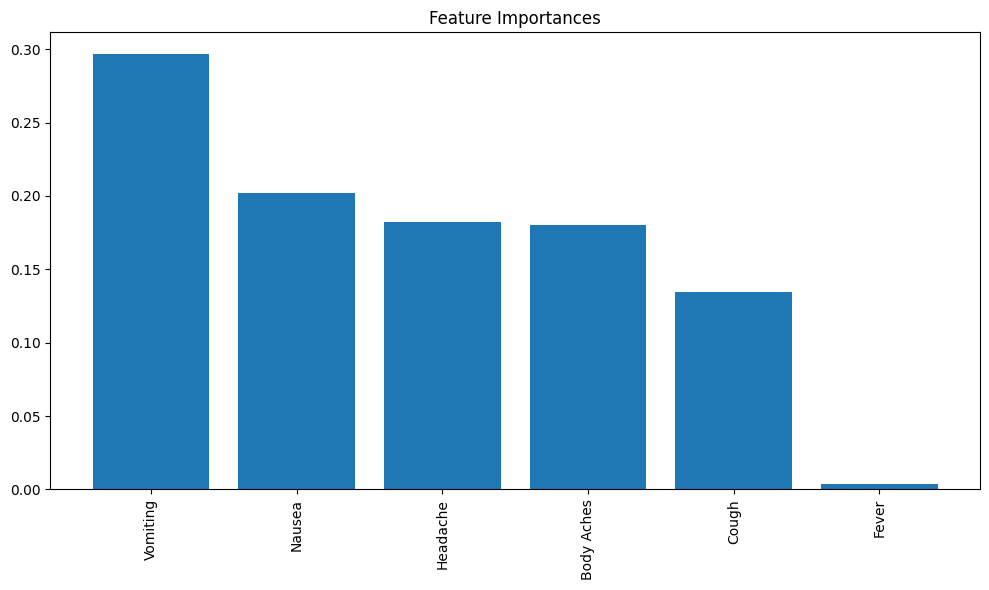

In [129]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), data.drop(columns=['Stages']).columns[indices], rotation=90)
plt.tight_layout()
plt.show()

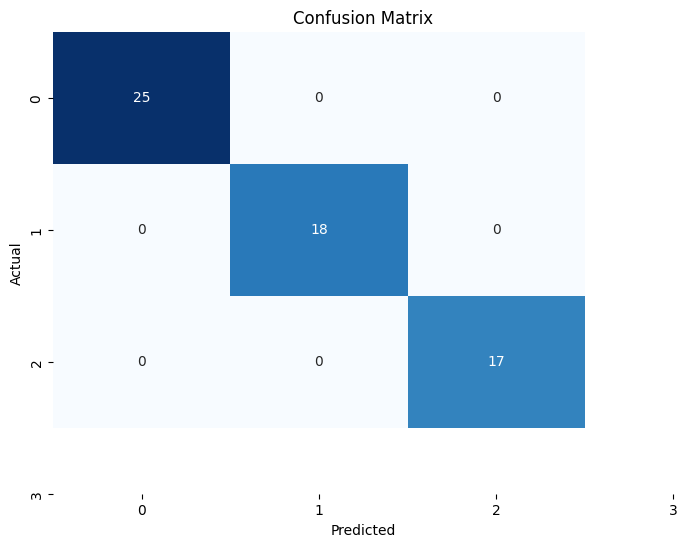

In [130]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()